# Data Cleaning

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# Load dataset
df = pd.read_csv("SBAnational.csv")

df.head()

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_2201/1874786272.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SBAnational.csv")


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
# Make copy of dataset
wdf = df.copy()

In [4]:
# Check data types
wdf.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

In [5]:
wdf.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


<Axes: >

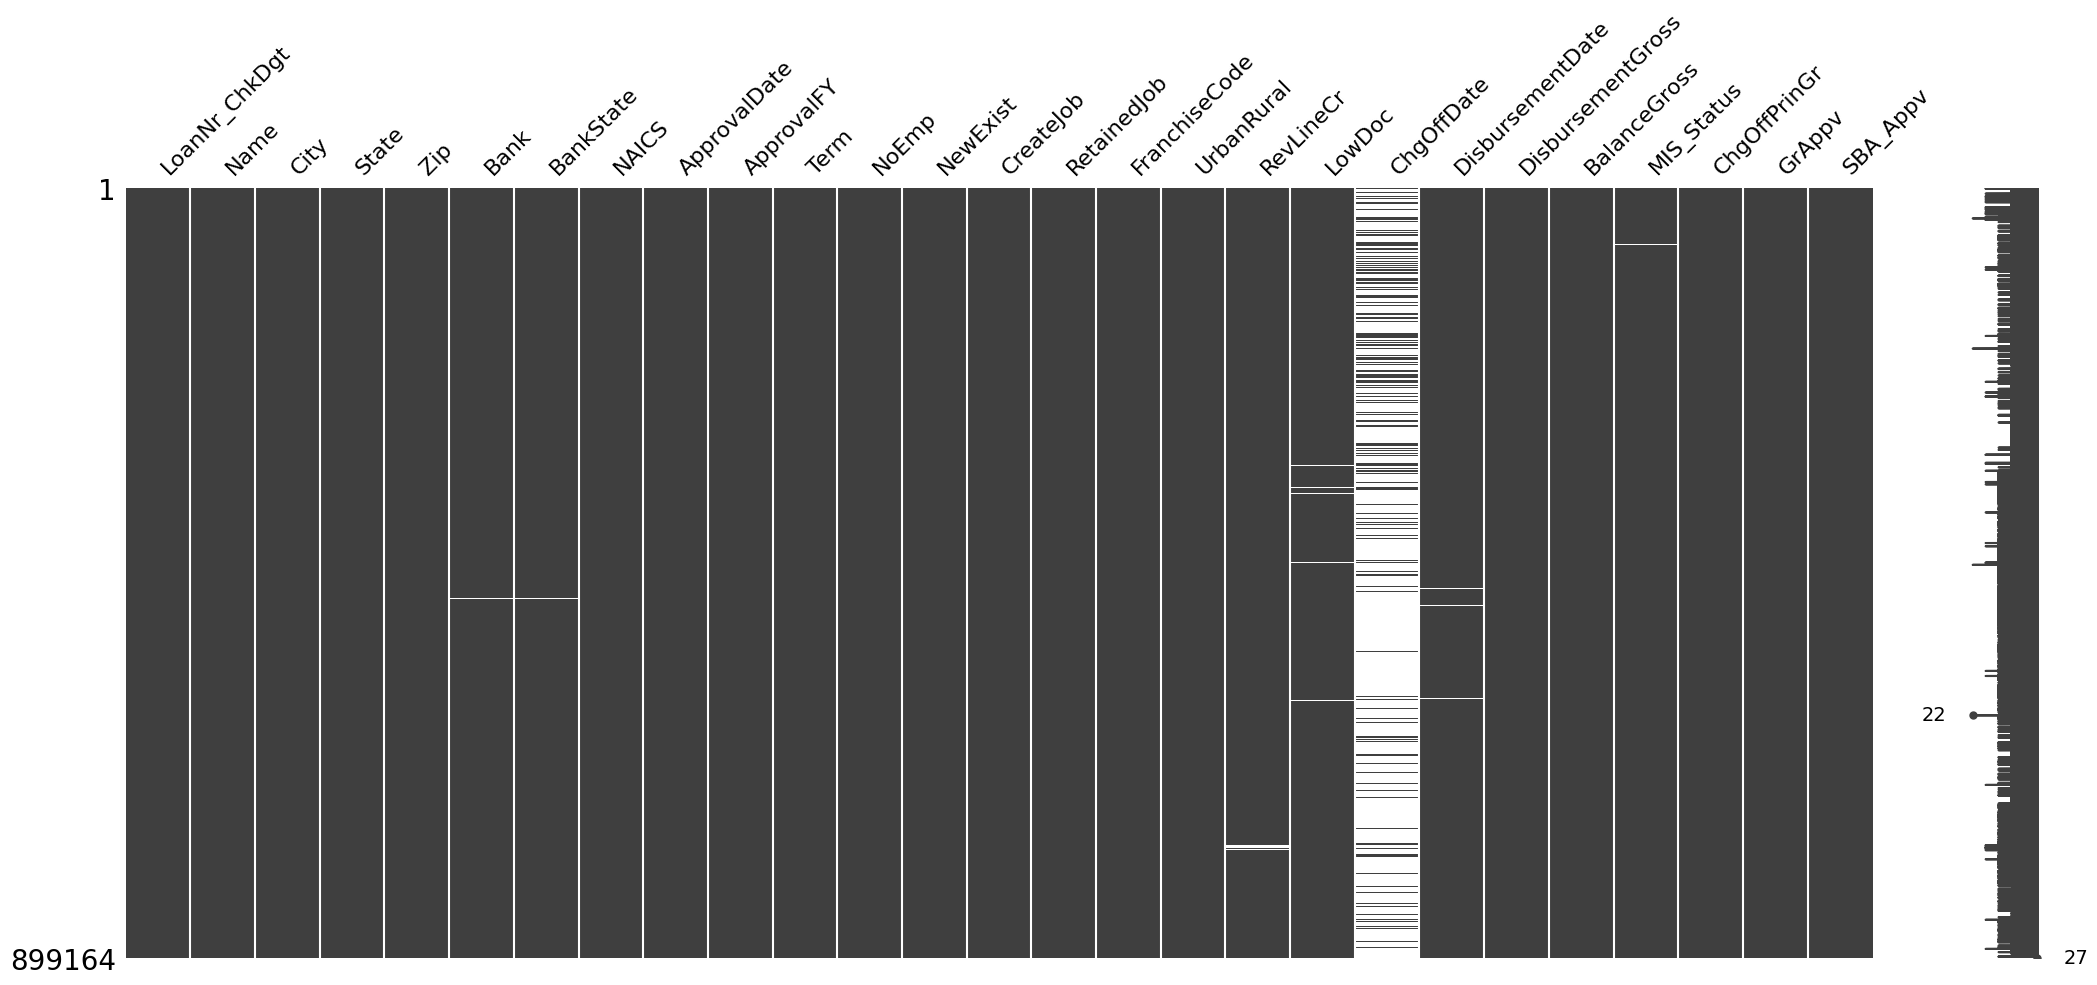

In [6]:
# View missing values matrix
msno.matrix(wdf)

In [7]:
# View columns (and the number of rows) with missing values
wdf.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

### Filter rows with missing target values

In [8]:
# Specify target column with missing rows
rows_with_missing_values = ['MIS_Status']

# Filter dataset to only include rows without missing target values
wdf = wdf[wdf[rows_with_missing_values].notna().all(axis=1)]

In [9]:
# View descriptive statistics
wdf.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.971670e+05,897167.000000,897167.000000,897167.000000,897167.000000,897033.000000,897167.000000,897167.000000,897167.000000,897167.000000
mean,4.774982e+09,53856.710734,398541.853498,110.848592,11.412562,1.280403,8.444305,10.807308,2757.528287,0.757274
std,2.537370e+09,31170.471151,263359.727579,78.900862,73.793775,0.451741,236.950249,237.382398,12767.025962,0.646540
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.593070e+09,27612.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.363894e+09,55416.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.908644e+09,83706.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


#### Clean by 'Name' column

In [10]:
# Check rows with missing name data
check_missing_name = wdf[wdf['Name'].isna()]

# check_missing_name

In [11]:
# Input unknown for rows with missing name data
wdf['Name'] = wdf['Name'].fillna('UNKNOWN NAME')

### Dealing with missing values

- Clean by 'City' column

In [12]:
# Check rows with missing city data
check_missing_city = wdf[wdf['City'].isna()]

# check_missing_city.head()

In [13]:
# View the zip code of rows with missing city data
check_missing_city['Zip'].unique()

array([84109, 70130, 60624, 60636, 92102, 44115, 63103, 63105, 63013,
       98104, 50309, 78204, 64106,  2169,  2108,  2401,  2165, 40209,
       28402, 48502])

In [14]:
# Create a dictionary to input city data based on zip code
zip_city = [84109, 70130, 60624, 60636, 
            92102, 44115, 63103, 63105, 
            63013, 98104, 50309, 78204, 
            64106,  2169,  2108,  2401,  
            2165, 40209, 28402, 48502]

city_code = ['SALT LAKE CITY', 'NEW ORLEANS', 'CHICAGO', 'CHICAGO', 
             'SAN DIEGO', 'CLEVELAND', 'ST. LOUIS', 'ST. LOUIS', 
             'BEAUFORT', 'SEATTLE', 'DES MOINES', 'SAN ANTONIO',
             'KANSAS CITY', 'BOSTON', 'BOSTON', 'FALL RIVER',
             'BOSTON', 'LOUISVILLE', 'WILMINGTON', 'FLINT']

# Create a dictionary to map zip code to city
zip_city_dict = dict(zip(zip_city, city_code))

# Input city data based on zip code
for key, value in zip_city_dict.items():
    wdf.loc[(wdf['Zip'] == key) & (wdf['City'].isna()), 'City'] = value

- Clean by 'State' column

In [15]:
# Check rows with missing state data
check_missing_state = wdf[wdf['State'].isna()]

# check_missing_state

In [16]:
# View the zip code of rows with missing state data 
check_missing_state['Zip'].unique()

array([    0, 95682, 96205, 67219, 79925, 33410, 54205, 54025, 84124,
       65049, 75236, 76052, 76645])

In [17]:
# Create a dictionary to input state data based on zip code (state for zip code with O value is determined by its city)
state_zipcode = [0, 95682, 96205, 67219, 
                79925, 33410, 54205, 54025, 
                84124, 65049, 75236, 76052, 
                76645]

state_code = ['NY', 'CA', 'CA', 'KS',
              'TX', 'FL', 'WI', 'WI',
              'UT', 'MO', 'TX', 'TX',
              'TX']

# Create a dictionary to map city name to state
state_city_dict = dict(zip(state_zipcode, state_code))

# Input state data based on city name
for key, value in state_city_dict.items():
    wdf.loc[(wdf['Zip'] == key) & (wdf['State'].isna()), 'State'] = value

- Clean by 'Bank' column

In [18]:
# Check rows with missing bank data
check_missing_bank = wdf[wdf['Bank'].isna()]

check_missing_bank.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
407,1003113008,MOUNTVILLE WALL PAPER CO,MOUNTVILLE,PA,17554,NaN,NaN,0,27-Jun-80,1980,...,N,N,4-Jun-90,25-Jul-80,"$600,000.00",$0.00,CHGOFF,"$320,976.00","$600,000.00","$499,998.00"
680,1004933009,TAYLOR BROTHERS COMPANY,CLEVELAND,OH,44114,NaN,NaN,0,8-Jul-80,1980,...,N,N,8-Feb-89,21-Aug-80,"$275,000.00",$0.00,CHGOFF,"$181,916.00","$275,000.00","$247,500.00"
16108,1117074003,ASSURED CORP/SMART DRYWALL CO.,DALLAS,TX,75220,NaN,NaN,235420,10-Apr-97,1997,...,N,Y,NaN,31-May-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00"
18188,1133353008,GALESBURG GRAIN INC,GALESBURG,KS,66740,NaN,NaN,0,15-Dec-80,1981,...,N,N,17-Mar-89,15-Dec-81,"$200,000.00",$0.00,CHGOFF,"$150,243.00","$200,000.00","$180,000.00"
27779,1209213009,"LONE STAR FORD, INC.",LONGVIEW,TX,75606,NaN,NaN,0,7-Apr-81,1981,...,N,N,30-Jul-91,22-Apr-81,"$500,000.00",$0.00,CHGOFF,"$362,262.00","$500,000.00","$450,000.00"


In [19]:
# Input unknown for rows with missing bank data
wdf['Bank'] = wdf['Bank'].fillna('UNKNOWN BANK')

- Clean by 'BankState' column

In [20]:
# Check rows with missing bankstate data
check_missing_bank_state = wdf[wdf['BankState'].isna()]

check_missing_bank_state.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
407,1003113008,MOUNTVILLE WALL PAPER CO,MOUNTVILLE,PA,17554,UNKNOWN BANK,NaN,0,27-Jun-80,1980,...,N,N,4-Jun-90,25-Jul-80,"$600,000.00",$0.00,CHGOFF,"$320,976.00","$600,000.00","$499,998.00"
680,1004933009,TAYLOR BROTHERS COMPANY,CLEVELAND,OH,44114,UNKNOWN BANK,NaN,0,8-Jul-80,1980,...,N,N,8-Feb-89,21-Aug-80,"$275,000.00",$0.00,CHGOFF,"$181,916.00","$275,000.00","$247,500.00"
16108,1117074003,ASSURED CORP/SMART DRYWALL CO.,DALLAS,TX,75220,UNKNOWN BANK,NaN,235420,10-Apr-97,1997,...,N,Y,NaN,31-May-97,"$100,000.00",$0.00,P I F,$0.00,"$100,000.00","$80,000.00"
18188,1133353008,GALESBURG GRAIN INC,GALESBURG,KS,66740,UNKNOWN BANK,NaN,0,15-Dec-80,1981,...,N,N,17-Mar-89,15-Dec-81,"$200,000.00",$0.00,CHGOFF,"$150,243.00","$200,000.00","$180,000.00"
27779,1209213009,"LONE STAR FORD, INC.",LONGVIEW,TX,75606,UNKNOWN BANK,NaN,0,7-Apr-81,1981,...,N,N,30-Jul-91,22-Apr-81,"$500,000.00",$0.00,CHGOFF,"$362,262.00","$500,000.00","$450,000.00"


In [21]:
# Input unknown for rows with missing bankstate data
wdf['BankState'] = wdf['BankState'].fillna('UB')

- Clean by 'NewExist' column (to be filled by iterative imputer)

In [22]:
pd.set_option('display.max_columns', None)

# Check rows with missing newexist data
check_missing_new_exist = wdf[wdf['NewExist'].isna()]

check_missing_new_exist.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
395231,3808405000,J.W.Chipping Corp,BETHLEHEM,NH,3574,FIRST COLEBROOK BANK,NH,423310,15-Dec-09,2010,72,7,NaN,0,7,0,2,N,N,NaN,15-Dec-09,"$117,000.00",$0.00,P I F,$0.00,"$117,000.00","$99,450.00"
399884,3854945010,D & R Foods Inc.,INDIANOLA,MS,38751,TRUSTMARK NATIONAL BANK,MS,445110,13-Jan-10,2010,38,20,NaN,0,20,0,2,N,N,NaN,1-Feb-10,"$150,000.00",$0.00,P I F,$0.00,"$150,000.00","$135,000.00"
400052,3856405005,"Luna Design Group, Inc.",LYNNFIELD,MA,1940,PEOPLE'S UNITED BANK,CT,541310,14-Jan-10,2010,73,4,NaN,0,4,0,1,N,N,NaN,25-Mar-10,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$25,000.00"
400203,3857955008,Lisbon Market Inc,LISBON,OH,44432,THE CITIZENS SAVINGS BANK,OH,445110,15-Jan-10,2010,84,0,NaN,25,0,0,1,N,N,NaN,15-Jan-10,"$350,000.00",$0.00,P I F,$0.00,"$350,000.00","$175,000.00"
400300,3858915009,"George F. Gales, Jr. MD",QUINCY,MA,2170,EASTERN BANK,MA,621111,15-Jan-10,2010,84,2,NaN,0,2,0,1,Y,N,NaN,1-Apr-10,"$52,395.00",$0.00,P I F,$0.00,"$50,000.00","$25,000.00"


In [23]:
# Input NaN for rows with missing newexist data
wdf['NewExist'] = wdf['NewExist'].fillna(0.0)
wdf['NewExist'] = wdf['NewExist'].replace({0.0: np.nan})

- Clean by 'RevLineCr' column (to be filled by iterative imputer)

In [24]:
# Input NaN for rows with "other" values in the RevLineCr' data
wdf['RevLineCr'] = wdf['RevLineCr'].replace(r'[0T1R`2C,37A5.4Q\-]', np.nan, regex=True)

In [25]:
# View counts of unique values in RevLineCr column
wdf['RevLineCr'].value_counts(dropna=False)

RevLineCr
N      419252
NaN    277255
Y      200660
Name: count, dtype: int64

- Clean by 'LowDoc' column (to be filled by iterative imputer)

In [26]:
# Replace values without "Y" or "N" with NA
wdf['LowDoc'] = wdf['LowDoc'].replace(r'[0CSAR1]',np.nan, regex=True)

In [27]:
# View counts of unique values in LowDoc column
wdf['LowDoc'].value_counts(dropna=False)

LowDoc
N      780997
Y      110171
NaN      5999
Name: count, dtype: int64

- Clean by 'DisbursementDate' column

In [28]:
# check_missing_disbursement_data = wdf[wdf['DisbursementDate'].isna()]

# check_missing_disbursement_data.head()

In [29]:
# Replace 'DisbursementDate' with 'ApprovalFY' if missing
# wdf['DisbursementDate'] = np.where(wdf['DisbursementDate'].isna(), wdf['ApprovalFY'], wdf['DisbursementDate'])

In [30]:
# wdf.head()

- Clean by 'ChgOffDate' column

In [31]:
# Replace 'ChgOffDate' with a default date '01-Jan-1970' if missing
wdf['ChgOffDate'] = np.where(wdf['ChgOffDate'].isna(), pd.to_datetime('01-Jan-1970', format='%d-%b-%Y'), wdf['ChgOffDate'])

### String and Numerical Data manipulations

- Convert columns with monetary values to integer

In [32]:
# Convert columns with monetary values to integers by removing decimal places and dollar signs
# to standardize the format and optimize storage for calculations.

list_monetary_integers = ['DisbursementGross', 'GrAppv', 'BalanceGross', 'SBA_Appv', 'ChgOffPrinGr']

wdf[list_monetary_integers] = round(wdf[list_monetary_integers].replace(r'[$,]', '', regex=True).astype(float), 2)

- Remove trailing spaces

In [33]:
# Remove spaces in 'MIS_STATUS' column
wdf['MIS_Status'] = wdf['MIS_Status'].apply(lambda x: str(x).replace(" ", ""))

### Encoding data, converting & adding more columns

- Map NAICS code to actvity type

In [34]:
# Get the first two digits of the NAICS code
wdf['NAICS_class_code'] = wdf['NAICS'].apply(lambda x: int(str(x)[:2]) if pd.notna(x) and len(str(x)) >= 2 else 81)

In [35]:
# Map NAICS code to industry
wdf['Industry'] = wdf['NAICS_class_code'].map({
    11: "Agriculture, forestry, fishing and hunting",
    21: "Mining, Quarrying, and oil and gas extraction",
    22: "Utilities",
    23: "Construction",
    31: "Manufacturing",
    32: "Manufacturing",
    33: "Manufacturing",
    42: "Wholesale trade",
    44: "Retail trade",
    45: "Retail trade",
    48: "Transportation and warehousing",
    49: "Transportation and warehousing",
    51: "Information",
    52: "Finance and insurance",
    53: "Real estate and rental and leasing",
    54: "Professional, scientific, and technical services",
    55: "Management of companies and enterprises",
    56: "Administrative and support and waste management and remediation services",
    61: "Educational services",
    62: "Health care and social assistance",
    71: "Arts, enternaiment, and recreation",
    72: "Accommodation and food services",
    81: "Other services", 
    92: "Public administration",
    })

- Encode MIS_STATUS 

In [36]:
# Map 'MIS_Status' to binary values
wdf['MIS_Status_Encoded'] = wdf['MIS_Status'].map({'PIF': 1, 'CHGOFF': 0})

- Encode LowDoc

In [37]:
# Map 'LowDoc' to binary values
wdf['LowDoc_Encoded'] = wdf['LowDoc'].map({'Y': 1, 'N': 0}, na_action='ignore')

In [38]:
# Convert 'LowDoc_Encoded' to integer
wdf['LowDoc_Encoded'] = wdf['LowDoc_Encoded'].astype('Int64')

- Encode RevLineCr

In [39]:
# Map 'RevLineCr' to binary values
wdf['RevLineCr_Encoded'] = wdf['RevLineCr'].map({'Y': 1, 'N': 0}, na_action='ignore')

In [40]:
# Convert 'RevLineCr_Encoded' to integer
wdf['RevLineCr_Encoded'] = wdf['RevLineCr_Encoded'].astype('Int64')

- Encode FranchiseCode

In [41]:
# Map 'FranchiseCode' to binary values
wdf['FranchiseCode_Encoded'] = wdf['FranchiseCode'].apply(lambda x: 1 if x > 1 else 0)

- Encode 'NewExist'

In [42]:
# Convert 'FranchiseCode_Encoded' to integer
wdf['NewExist'] = wdf['NewExist'].astype('Int64')

In [43]:
# Map 'NewExist' to binary values
wdf['NewExist_Encode'] = wdf['NewExist'].map({1: 1, 2: 0}, na_action='ignore')


In [44]:
wdf['NewExist_Encode'] = wdf['NewExist_Encode'].astype('Int64')

- Add Real Estate Backed Loans

In [45]:
# Map 'Term' to binary values
wdf['RealEstate_Backed'] = wdf['Term'].apply(lambda x: 1 if x >= 240 else 0)

-  Convert Date columns to DateTime object

In [46]:
# Convert ApprovalDate and ChgOffDate columns to datetime format
wdf['ApprovalDate'] = pd.to_datetime(wdf['ApprovalDate'], errors='ignore', format='%d-%b-%y')
wdf['ChgOffDate'] = pd.to_datetime(wdf['ChgOffDate'], errors='ignore', format='%d-%b-%y')

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_2201/412508914.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  wdf['ApprovalDate'] = pd.to_datetime(wdf['ApprovalDate'], errors='ignore', format='%d-%b-%y')
/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_2201/412508914.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  wdf['ChgOffDate'] = pd.to_datetime(wdf['ChgOffDate'], errors='ignore', format='%d-%b-%y')


In [47]:
# Extract year from 'ApprovalDate' and 'ChgOffDate' columns
wdf['ApprovalDateYear'] = wdf['ApprovalDate'].dt.year
wdf['ChgOffDateYear'] = wdf['ChgOffDate'].dt.year

In [48]:
# Extract month from 'ApprovalDate' columns
wdf['ApprovalDateMonth'] = wdf['ApprovalDate'].dt.month

In [49]:
# Convert 'ApprovalFY' to string
wdf['ApprovalFY'] = wdf['ApprovalFY'].apply(lambda x: str(x).strip()[:4])

# Convert 'ApprovalFY' to datetime format
wdf['ApprovalFY'] = pd.to_datetime(wdf['ApprovalFY'], errors='raise', format='mixed')

# Extract year from 'ApprovalFY' column
wdf['ApprovalFY'] = wdf['ApprovalFY'].dt.year

In [50]:
# Remove spaces in 'DisbursementDate' column
wdf['DisbursementDate'] = wdf['DisbursementDate'].apply(lambda x: str(x).strip())

# Convert 'DisbursementDate' to datetime format
wdf['DisbursementDate'] = pd.to_datetime(wdf['DisbursementDate'], errors='ignore',format='%d-%b-%y')

wdf['DisbursementDate'] =  wdf['DisbursementDate'].replace(np.nan, pd.to_datetime('01-Jan-1970', format='%d-%b-%Y'))

wdf['DisbursementDateYear'] = wdf['DisbursementDate'].dt.year

# # Replace 'DisbursementDate' with a default date '01-Jan-1970' if missing
# wdf['DisbursementDateYear'] = np.where(wdf['DisbursementDateYear'] == 1970, wdf['ApprovalDateYear'], wdf['DisbursementDate'])

/var/folders/ml/v613w2ns1z31hpn87j8vcl8h0000gq/T/ipykernel_2201/393413458.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  wdf['DisbursementDate'] = pd.to_datetime(wdf['DisbursementDate'], errors='ignore',format='%d-%b-%y')


- Encoding 'UrbanRural' column

In [57]:
wdf['UrbanRural_Encoded'] = wdf['UrbanRural'].map({1: 2, 2: 1, 0: 0}) 

- Encode 'State' column

In [62]:
# Check unique values in 'State' column
all_states = wdf['State'].unique()

# Group states into regions
northern_states_in_all_states = ['ME', 'NH', 'VT', 'MA', 'CT', 'RI', 'NY', 'PA', 'NJ', 'DE', 'MD', 'DC']
western_satates_in_all_starts = ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM', 'AK', 'HI']
eastern_states_in_all_states = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH', 'KY', 'WV', 'VA', 'NC', 'SC', 'TN', 'AR', 'OK', 'LA', 'MS', 'AL', 'GA', 'FL']
southern_states_in_all_states = ['TX']

# Create a new column 'Region' to group states into regions
wdf['Region'] = wdf['State'].apply(lambda x: 'Northern' if x in northern_states_in_all_states else ('Western' if x in western_satates_in_all_starts else ('Eastern' if x in eastern_states_in_all_states else 'Southern')))

- Encode 'BankState' column

In [65]:
# Check unique values in 'BankState' column
all_bank_states = wdf['BankState'].unique()

# Group states into regions
northern_states_in_all_bank_states = ['ME', 'NH', 'VT', 'MA', 'CT', 'RI', 'NY', 'PA', 'NJ', 'DE', 'MD', 'DC']
western_satates_in_all_bank_starts = ['WA', 'OR', 'CA', 'NV', 'ID', 'MT', 'WY', 'UT', 'CO', 'AZ', 'NM', 'AK', 'HI']
eastern_states_in_all_bank_states = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH', 'KY', 'WV', 'VA', 'NC', 'SC', 'TN', 'AR', 'OK', 'LA', 'MS', 'AL', 'GA', 'FL']
southern_states_in_all_bank_states = ['TX']

# Create a new column 'BankRegion' to group states into regions
wdf['BankRegion'] = wdf['BankState'].apply(lambda x: 'Northern' if x in northern_states_in_all_bank_states else ('Western' if x in western_satates_in_all_bank_starts else ('Eastern' if x in eastern_states_in_all_bank_states else 'Southern')))

- Encode to determine "Recession"

In [71]:
# Convert 'Term' to days
wdf["TermDays"] = wdf['Term'] * 30

# Calculate 'LoanDateEnd' by adding 'TermDays' to 'DisbursementDate'
wdf["LoanDateEnd"] = wdf['DisbursementDate'] + pd.to_timedelta(wdf['TermDays'], unit='D')

In [76]:
# Define the recession period
recession_start = pd.to_datetime('2007-12-01')
recession_end = pd.to_datetime('2009-06-30')

# Create a new column 'Reccession' to indicate if the loan was disbursed during the recession period
wdf['Reccession'] = np.where((wdf['LoanDateEnd'] >= recession_start) & (wdf['LoanDateEnd'] <= recession_end), 1, 0)

In [77]:
wdf.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,NAICS_class_code,Industry,MIS_Status_Encoded,LowDoc_Encoded,RevLineCr_Encoded,FranchiseCode_Encoded,NewExist_Encode,RealEstate_Backed,ApprovalDateYear,ChgOffDateYear,ApprovalDateMonth,DisbursementDateYear,UrbanRural_Encoded,Region,BankRegion,TermDays,LoanDateEnd,Reccession
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2,0,0,1,0,N,Y,1970-01-01,1999-02-28,60000.0,0.0,PIF,0.0,60000.0,48000.0,45,Retail trade,1,1,0,0,0,0,1997,1970,2,1999,0,Eastern,Eastern,2520,2006-01-22,0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2,0,0,1,0,N,Y,1970-01-01,1997-05-31,40000.0,0.0,PIF,0.0,40000.0,32000.0,72,Accommodation and food services,1,1,0,0,0,0,1997,1970,2,1997,0,Eastern,Eastern,1800,2002-05-05,0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1,0,0,1,0,N,N,1970-01-01,1997-12-31,287000.0,0.0,PIF,0.0,287000.0,215250.0,62,Health care and social assistance,1,0,0,0,1,0,1997,1970,2,1997,0,Eastern,Eastern,5400,2012-10-13,0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1,0,0,1,0,N,Y,1970-01-01,1997-06-30,35000.0,0.0,PIF,0.0,35000.0,28000.0,81,Other services,1,1,0,0,1,0,1997,1970,2,1997,0,Eastern,Eastern,1800,2002-06-04,0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1,7,7,1,0,N,N,1970-01-01,1997-05-14,229000.0,0.0,PIF,0.0,229000.0,229000.0,81,Other services,1,0,0,0,1,1,1997,1970,2,1997,0,Eastern,Eastern,7200,2017-01-29,0


In [80]:
# Filter data for model training. Choose columns that are relevant to the model and avoids target leakage.
filter_data_for_model = wdf[['MIS_Status_Encoded', 'NewExist_Encode', 'UrbanRural_Encoded', 'RevLineCr_Encoded', 'LowDoc_Encoded', 'NAICS', 'NAICS_class_code', 'FranchiseCode_Encoded', 'Term', 'TermDays', 'NoEmp', 'RealEstate_Backed', 'Region', 'BankRegion']]

In [81]:
filter_data_for_model.dtypes

MIS_Status_Encoded        int64
NewExist_Encode           Int64
UrbanRural_Encoded        int64
RevLineCr_Encoded         Int64
LowDoc_Encoded            Int64
NAICS                     int64
NAICS_class_code          int64
FranchiseCode_Encoded     int64
Term                      int64
TermDays                  int64
NoEmp                     int64
RealEstate_Backed         int64
Region                   object
BankRegion               object
dtype: object

In [82]:
filter_data_for_model.isna().sum()

MIS_Status_Encoded            0
NewExist_Encode            1162
UrbanRural_Encoded            0
RevLineCr_Encoded        277255
LowDoc_Encoded             5999
NAICS                         0
NAICS_class_code              0
FranchiseCode_Encoded         0
Term                          0
TermDays                      0
NoEmp                         0
RealEstate_Backed             0
Region                        0
BankRegion                    0
dtype: int64

In [83]:
test_data_for_model = filter_data_for_model[filter_data_for_model.notna().all(axis=1)]

In [84]:
test_data_for_model.to_csv('test_data_for_model.csv', index=False)